In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
# Removing the columns not required
df.drop(['SNo','Last Update'],axis=1,inplace=True)

# Renaming the columns  
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace = True)

# Converting data to pandas' internal date format
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [4]:
# Dealing with Missing Values
df = df.fillna(0)

In [5]:
# Grouping country-wise
df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()
df2.head()

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0


### Displaying trend for the top 5 affected countries

In [6]:
df2 = df2.sort_values("Confirmed",ascending = False)
df2.head(20)

,Country,Confirmed,Deaths,Recovered
214,US,6.049146e+09,123303762.0,5.033710e+08
96,India,3.226768e+09,44424723.0,2.900590e+09
27,Brazil,2.653588e+09,72624610.0,2.313677e+09
172,Russia,9.305488e+08,18363719.0,7.907057e+08
71,France,8.551890e+08,22720818.0,6.940743e+07
213,UK,7.837944e+08,29171984.0,2.327572e+06
194,Spain,6.491118e+08,19065104.0,6.119362e+07
102,Italy,6.366943e+08,26000702.0,4.877998e+08
212,Turkey,6.189410e+08,6841158.0,5.641706e+08
77,Germany,5.241668e+08,13364216.0,4.533833e+08


In [7]:
# Finding top 5 affected countries

L = [] 
cnt = 0
for index, row in df2.iterrows():
    
    L.append(row["Country"])
    
    cnt += 1
    if(cnt == 5):
        break

print(L)

['US', 'India', 'Brazil', 'Russia', 'France']


In [8]:
df3 = df.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

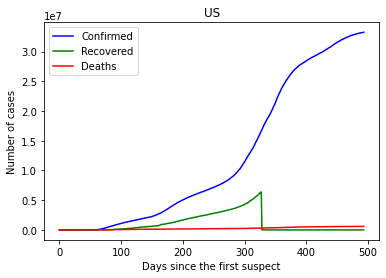

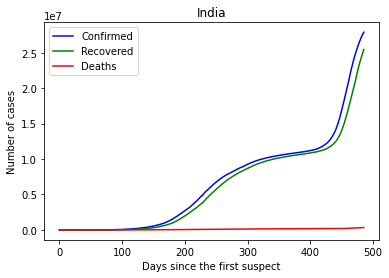

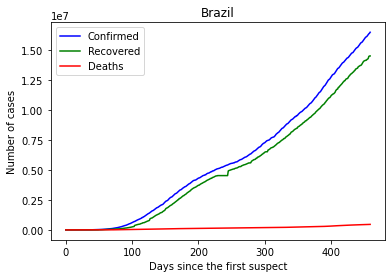

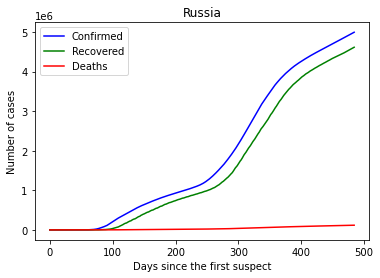

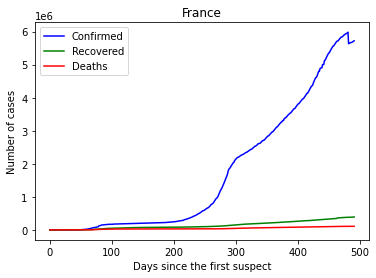

In [9]:
for i in range(5):
    
    C = df3[df3['Country']==L[i]].reset_index()
    
    #print(L[i])
    
    plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    
    
    plt.title(L[i])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    
    plt.show()    

### Displaying World trend

In [10]:
df4 = df.groupby('Date')[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

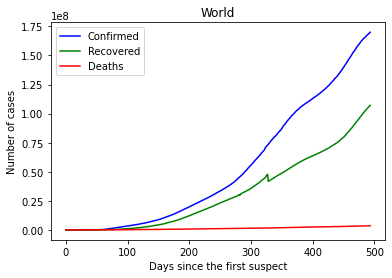

In [11]:
C = df4
plt.plot(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.plot(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.plot(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()